In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn-whitegrid")

In [2]:
class LogParser:
    def __init__(self, csv, nrows):
        self.df = pd.read_csv(csv, nrows=nrows)
    
    @property
    def score(self):
        return self.df["scores"].values
    
    @property
    def loss(self):
        return self.df["loss"].values
    
    def _avg(self, vals, epoch):
        num = vals.shape[0]
        vals = vals.reshape(num // epoch, -1)
        return np.average(vals, axis=1)
    
    def _max(self, vals, epoch):
        num = vals.shape[0]
        vals = vals.reshape(num // epoch, -1)
        return np.max(vals, axis=1)
    
    def avg_score(self, epoch):
        return self._avg(self.score, epoch)
    
    def avg_reward(self, epoch):
        return self._avg(self.reward, epoch)

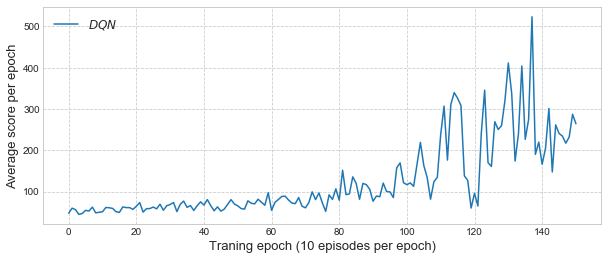

In [10]:
nrows = 2000
dqn = LogParser("./objects_dqn/scores_df.csv", nrows)
# dqn_bn = LogParser("../experiments/dqn_bn.csv", nrows)

plt.figure(figsize=(10, 4))
plt.plot(dqn.avg_score(10), label=r'$DQN$')
# plt.plot(dqn_bn.avg_score(10), label=r'$DQN\,\,with\,\,BN$')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')
# plt.savefig("exp-dqn.png", dpi=100)

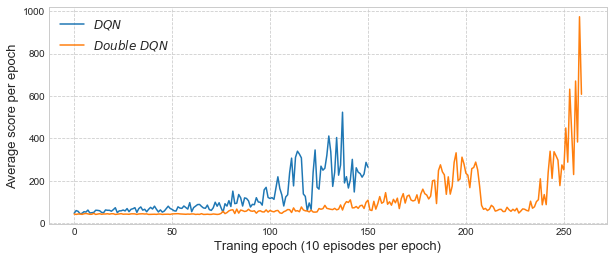

In [33]:
nrows = 2600
# dqn = LogParser("../experiments/dqn.csv", nrows)
double_dqn = LogParser("./objects_ddqn/scores_df.csv", nrows)

plt.figure(figsize=(10, 4))
plt.plot(dqn.avg_score(10), label=r'$DQN$')
plt.plot(double_dqn.avg_score(10), label=r'$Double\,\,DQN$')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')
# plt.savefig("exp-double-dqn.png", dpi=100)

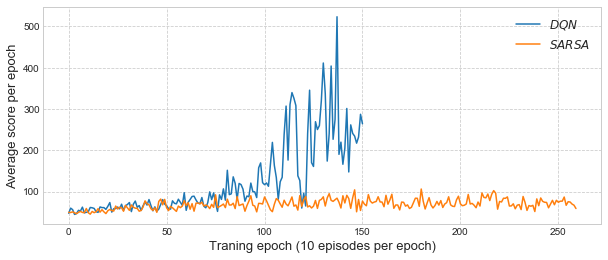

In [34]:
nrows = 2600
# dqn = LogParser("../experiments/dqn.csv", nrows)
exp_sarsa = LogParser("./objects_sarsa/scores_df.csv", nrows)

plt.figure(figsize=(10, 4))
plt.plot(dqn.avg_score(10), label=r'$DQN$')
plt.plot(exp_sarsa.avg_score(10), label=r'$SARSA$')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')
# plt.savefig("exp-double-dqn.png", dpi=100)